Text(0, 0.5, 'Current(mA)')

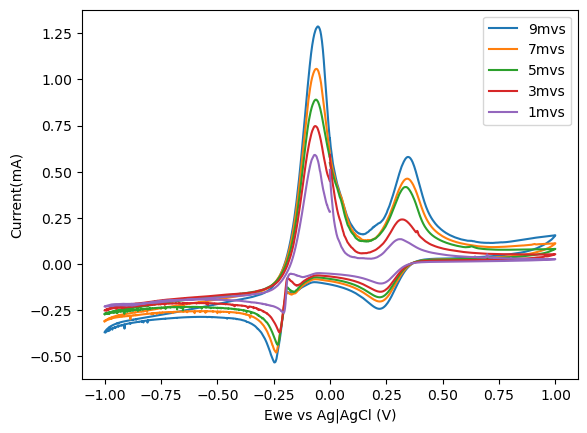

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def read_data_from_file(file_path):
    # Read the data from the file
    data = np.loadtxt(file_path)
    
    # Split the data into two columns
    column1 = data[:, 0]
    column2 = data[:, 1]
    column3 = data[:, 2]
    
    return column1, column2, column3

# Example usage:
file1 = 'Faradaic/9mvs.csv'  
column1, column2, column3 = read_data_from_file(file1)
file2= 'Faradaic/7mvs.csv'  
column4, column5, column6 = read_data_from_file(file2)
file3 = 'Faradaic/5mvs.csv'  
column7, column8, column9 = read_data_from_file(file3)
file4 = 'Faradaic/3mvs.csv'  
column10, column11, column12 = read_data_from_file(file4)
file5 = 'Faradaic/1mvs.csv'  
column13, column14, column15 = read_data_from_file(file5)

plt.plot(column1,column2)
plt.plot(column4,column5)
plt.plot(column7,column8)
plt.plot(column10,column11)
plt.plot(column13,column14)
plt.legend(['9mvs', '7mvs', '5mvs', '3mvs', '1mvs'])
plt.xlabel('Ewe vs Ag|AgCl (V)')
plt.ylabel('Current(mA)')

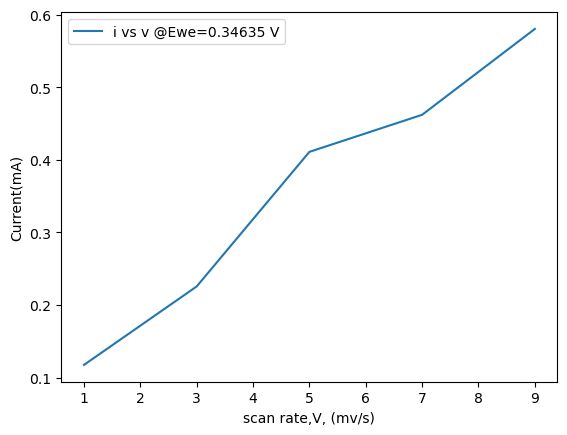

In [52]:
target =0.34635
index = min(range(len(column1)), key=lambda i: abs(column1[i] - target))

i1=column2[index]
i2=column5[index]
i3=column8[index]
i4=column11[index]
i5=column14[index]

t=[column3[index],column6[index],column9[index],column12[index],column15[index]]

x = [9,7,5,3,1]
y=[i1,i2,i3,i4,i5]
plt.plot(x,y)
plt.xlabel('scan rate,V, (mv/s)')
plt.ylabel('Current(mA)')
plt.legend([f"i vs v @Ewe={target} V"])

TS-PG Method @E=0.34635 V:
Fitted parameters:
a = 0.0788   b = 0.0385   c = 0.0000
R-squared: 0.9802
------------------------------------------------------------------------------------

Current Distributions(@9mv/s):
 faradaic(mA) = 0.2365     capacitive(mA) = 0.3462   pseudocapacitive(mA) = 0.0000
Charge Distributions(@9mv/s):
 faradaic(mAs) = 9.1183   capacitive(mAs) = 13.3474  pseudocapacitive(mAs) = 0.0000
 faradaic = 40.5876%       capacitive = 59.4124%     pseudocapacitive = 0.0000%
------------------------------------------------------------------------------------

Current Distributions(@7mv/s):
 faradaic(mA) = 0.2086     capacitive(mA) = 0.2693   pseudocapacitive(mA) = 0.0000
Charge Distributions(@7mv/s):
 faradaic(mAs) = 10.3303   capacitive(mAs) = 13.3359  pseudocapacitive(mAs) = 0.0000
 faradaic = 43.6499%       capacitive = 56.3501%     pseudocapacitive = 0.0000%
------------------------------------------------------------------------------------

Current Distributions(@5

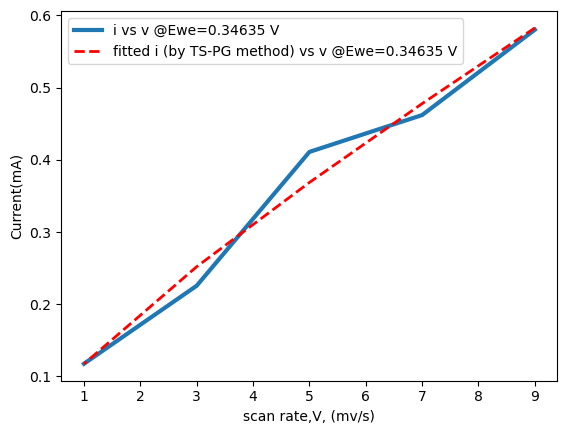

In [53]:
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Define the model function
def model(x, a, b, c):
    return a * np.sqrt(x) + b * x + c * x**1.5

# Perform curve fitting with non-negative constraints
params, covariance = curve_fit(model, x, y, bounds=(0, np.inf))

# Extract the parameters
a, b, c = params
print(f"TS-PG Method @E={target} V:\nFitted parameters:\na = {a:.4f}   b = {b:.4f}   c = {c:.4f}")

y1=model(x[0],a,b,c)
y2=model(x[1],a,b,c)
y3=model(x[2],a,b,c)
y4=model(x[3],a,b,c)
y5=model(x[4],a,b,c)

ymodel=[y1,y2,y3,y4,y5]

# Plotting the first line (solid)
plt.plot(x, y,linewidth=3, label=f"i vs v @Ewe={target} V")

# Plotting the second line (dashed and tiny)
plt.plot(x, ymodel, linestyle='--', linewidth=2,color='r', label=f"fitted i (by TS-PG method) vs v @Ewe={target} V")

# Adding the legend
plt.legend()
plt.xlabel('scan rate,V, (mv/s)')
plt.ylabel('Current(mA)')

# Calculate R-squared using sklearn
r_squared = r2_score(y,ymodel)

print(f"R-squared: {r_squared:.4f}")
print('-' * 84)

for i in range(len(x)):
    ifara = a * np.sqrt(x[i])
    icapa = b * x[i]
    ipseudo = c * x[i]**1.5
    
    qfara = ifara * t[i]
    qcapa = icapa * t[i]
    qpseudo = ipseudo * t[i]
    qtotal = qfara + qcapa + qpseudo

    percentf = qfara / qtotal * 100
    percentc = qcapa / qtotal * 100
    percentp = qpseudo / qtotal * 100
    print(f"\nCurrent Distributions(@{x[i]}mv/s):\n faradaic(mA) = {ifara:.4f}     capacitive(mA) = {icapa:.4f}   pseudocapacitive(mA) = {ipseudo:.4f}")
    print(f"Charge Distributions(@{x[i]}mv/s):\n faradaic(mAs) = {qfara:.4f}   capacitive(mAs) = {qcapa:.4f}  pseudocapacitive(mAs) = {qpseudo:.4f}")
    print(f" faradaic = {percentf:.4f}%       capacitive = {percentc:.4f}%     pseudocapacitive = {percentp:.4f}%")
    print('-' * 84)

Dunn Method @E=0.34635 V:
Fitted parameters:
a = 0.0788   b = 0.0385
R-squared: 0.9802
------------------------------------------------------------

Current Distributions(@9mv/s):
 faradaic(mA) = 0.2365     (pseudo)capacitive(mA) = 0.3462
Charge Distributions(@9mv/s):
 faradaic(mAs) = 9.1183   (pseudo)capacitive(mAs) = 13.3474
 faradaic = 40.5876%       (pseudo)capacitive = 59.4124%
------------------------------------------------------------

Current Distributions(@7mv/s):
 faradaic(mA) = 0.2086     (pseudo)capacitive(mA) = 0.2693
Charge Distributions(@7mv/s):
 faradaic(mAs) = 10.3303   (pseudo)capacitive(mAs) = 13.3359
 faradaic = 43.6499%       (pseudo)capacitive = 56.3501%
------------------------------------------------------------

Current Distributions(@5mv/s):
 faradaic(mA) = 0.1763     (pseudo)capacitive(mA) = 0.1924
Charge Distributions(@5mv/s):
 faradaic(mAs) = 12.2229   (pseudo)capacitive(mAs) = 13.3359
 faradaic = 47.8227%       (pseudo)capacitive = 52.1773%
--------------

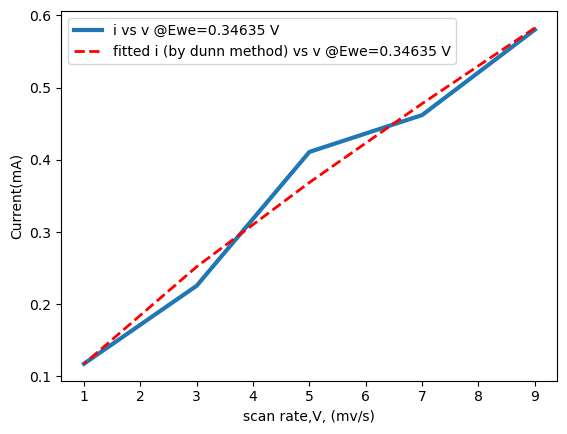

In [54]:
#dunn_method
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Define the model function
def model(x, a, b):
    return a * np.sqrt(x) + b * x

# Perform curve fitting with non-negative constraints
params, covariance = curve_fit(model, x, y, bounds=(0, np.inf))

# Extract the parameters
a, b= params
print(f"Dunn Method @E={target} V:\nFitted parameters:\na = {a:.4f}   b = {b:.4f}")

y1=model(x[0],a,b)
y2=model(x[1],a,b)
y3=model(x[2],a,b)
y4=model(x[3],a,b)
y5=model(x[4],a,b)

ymodel=[y1,y2,y3,y4,y5]

# Plotting the first line (solid)
plt.plot(x, y,linewidth=3, label=f"i vs v @Ewe={target} V")

# Plotting the second line (dashed and tiny)
plt.plot(x, ymodel, linestyle='--', linewidth=2,color='r', label=f"fitted i (by dunn method) vs v @Ewe={target} V")

# Adding the legend
plt.legend()
plt.xlabel('scan rate,V, (mv/s)')
plt.ylabel('Current(mA)')

# Calculate R-squared using sklearn
r_squared = r2_score(y,ymodel)

print(f"R-squared: {r_squared:.4f}")
print('-' * 60)

for i in range(len(x)):
    ifara = a * np.sqrt(x[i])
    icapa = b * x[i]
    
    qfara = ifara * t[i]
    qcapa = icapa * t[i]
    qtotal = qfara + qcapa

    percentf = qfara / qtotal * 100
    percentc = qcapa / qtotal * 100
    print(f"\nCurrent Distributions(@{x[i]}mv/s):\n faradaic(mA) = {ifara:.4f}     (pseudo)capacitive(mA) = {icapa:.4f}")
    print(f"Charge Distributions(@{x[i]}mv/s):\n faradaic(mAs) = {qfara:.4f}   (pseudo)capacitive(mAs) = {qcapa:.4f}")
    print(f" faradaic = {percentf:.4f}%       (pseudo)capacitive = {percentc:.4f}%")
    print('-' * 60)